# Data Scientist
* Mr Prince Kumar
# ===========================================================


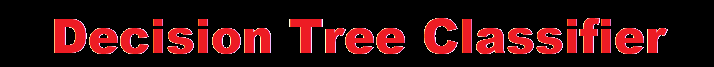


# =============================================================

## Decision Tree Classifier
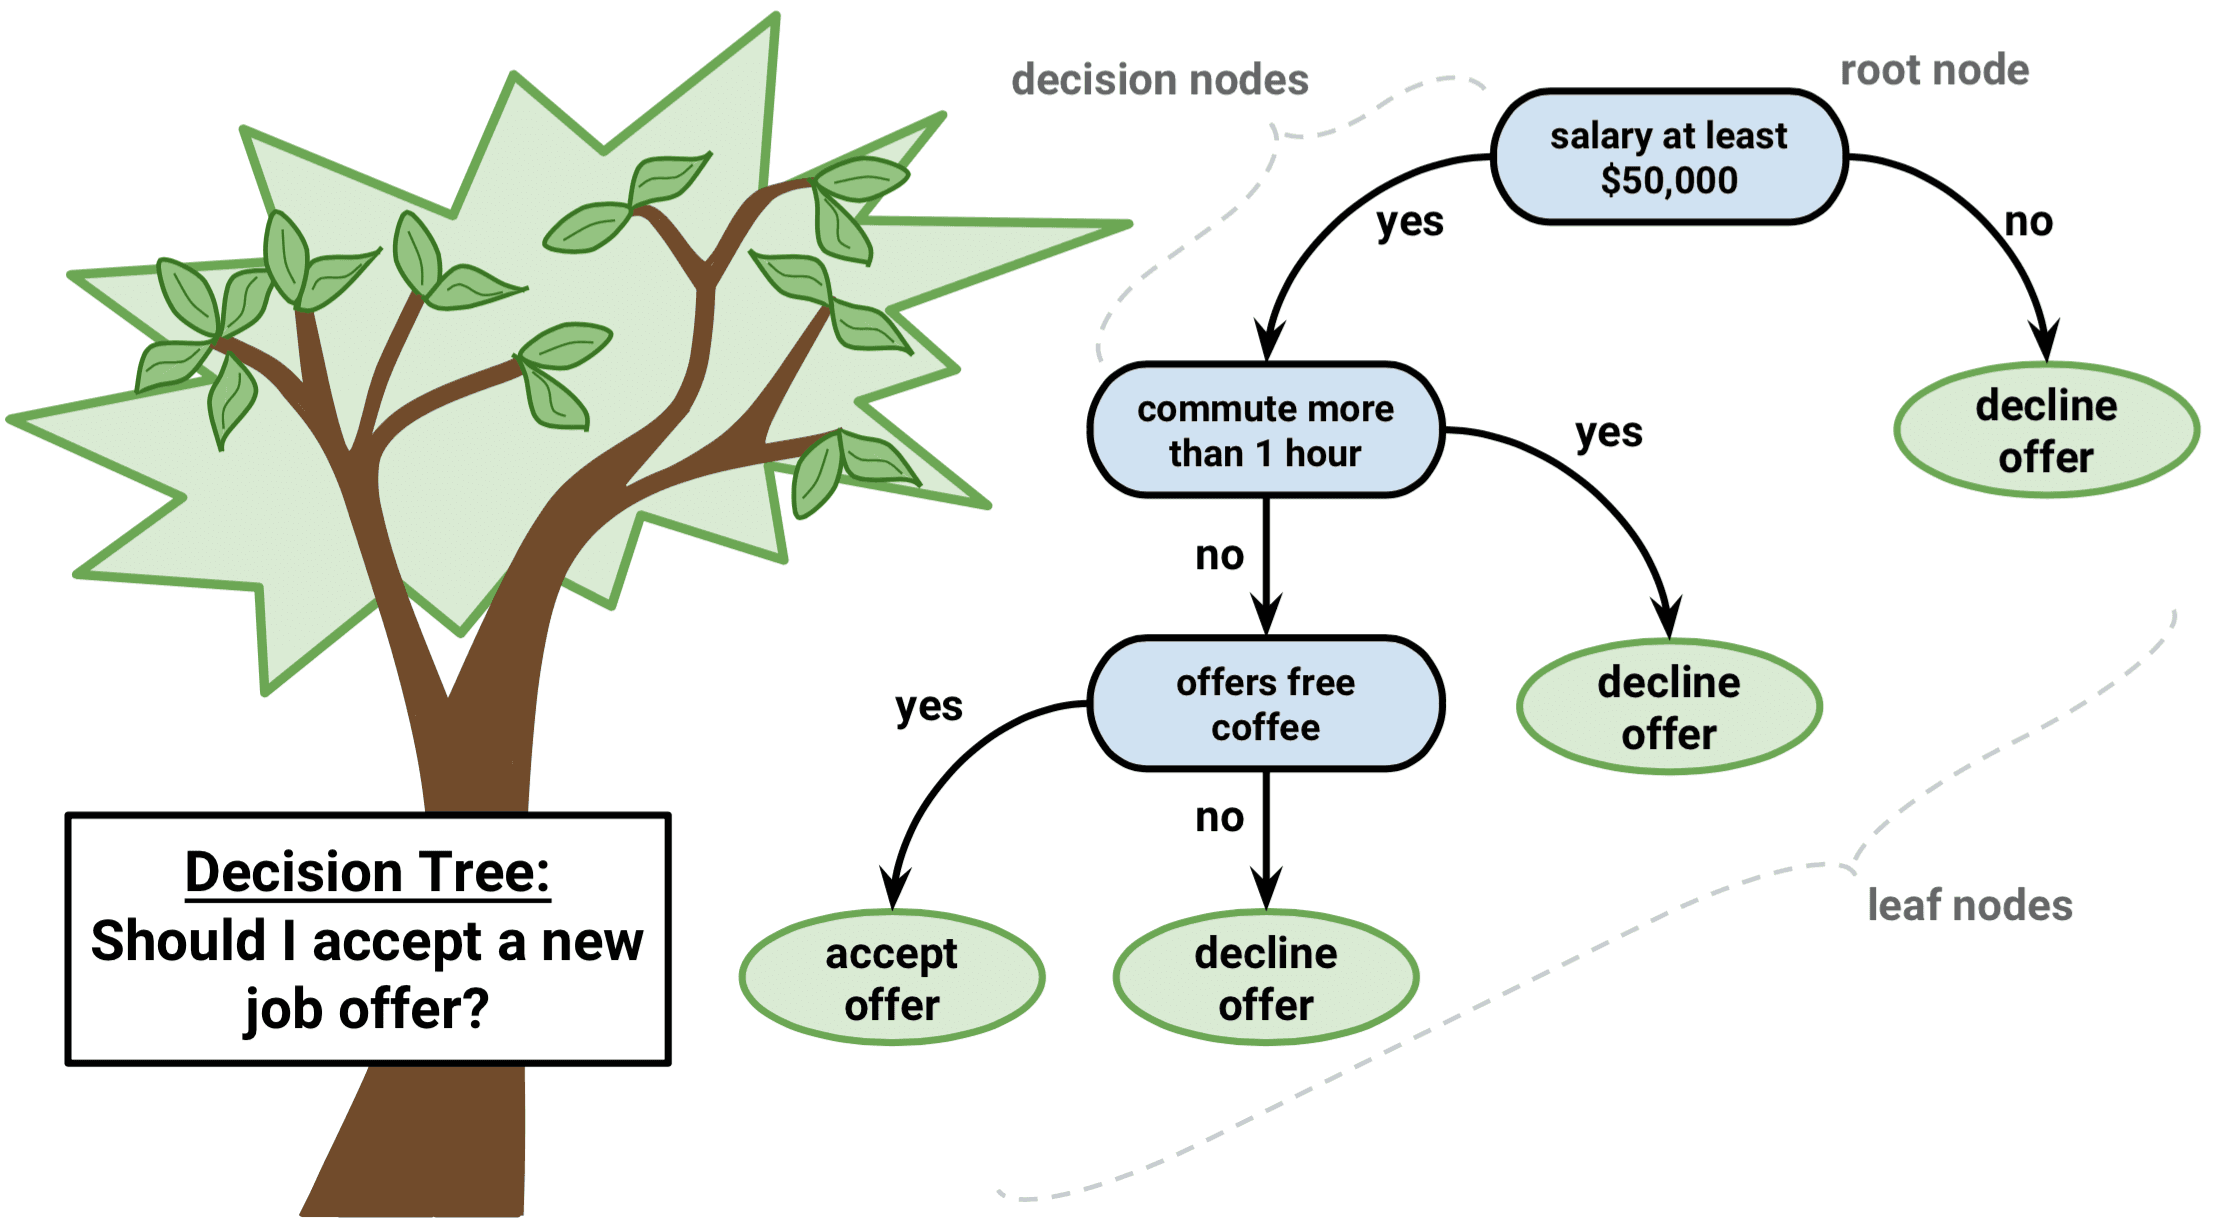

### Decision Tree --->
* Decision Tree is a supervised Machine learning Technique that can be use for classification and Regression problem but mostly it is used preffered for solving classification problem.

* It is a Tree -structrued classifer
* Its basically looks like if else condition
#### Terminal Node is also called Leaf Node

###  Branches of Decision Tree
1. Root node -- It is the beigning part of tree 
2. Decision Node -- It basically split the node
3. Leaf Node -- It is the outcomes where spliting is not possible 


##### Decision Tree work with two models
1. CART -  Classification And Regression Tree 
2. ID3

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.



## Decision Tree Terminologies
1. Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
2. Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
3. Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
4. Branch/Sub Tree: A tree formed by splitting the tree.
5. Pruning: Pruning is the process of removing the unwanted branches from the tree.
6. Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

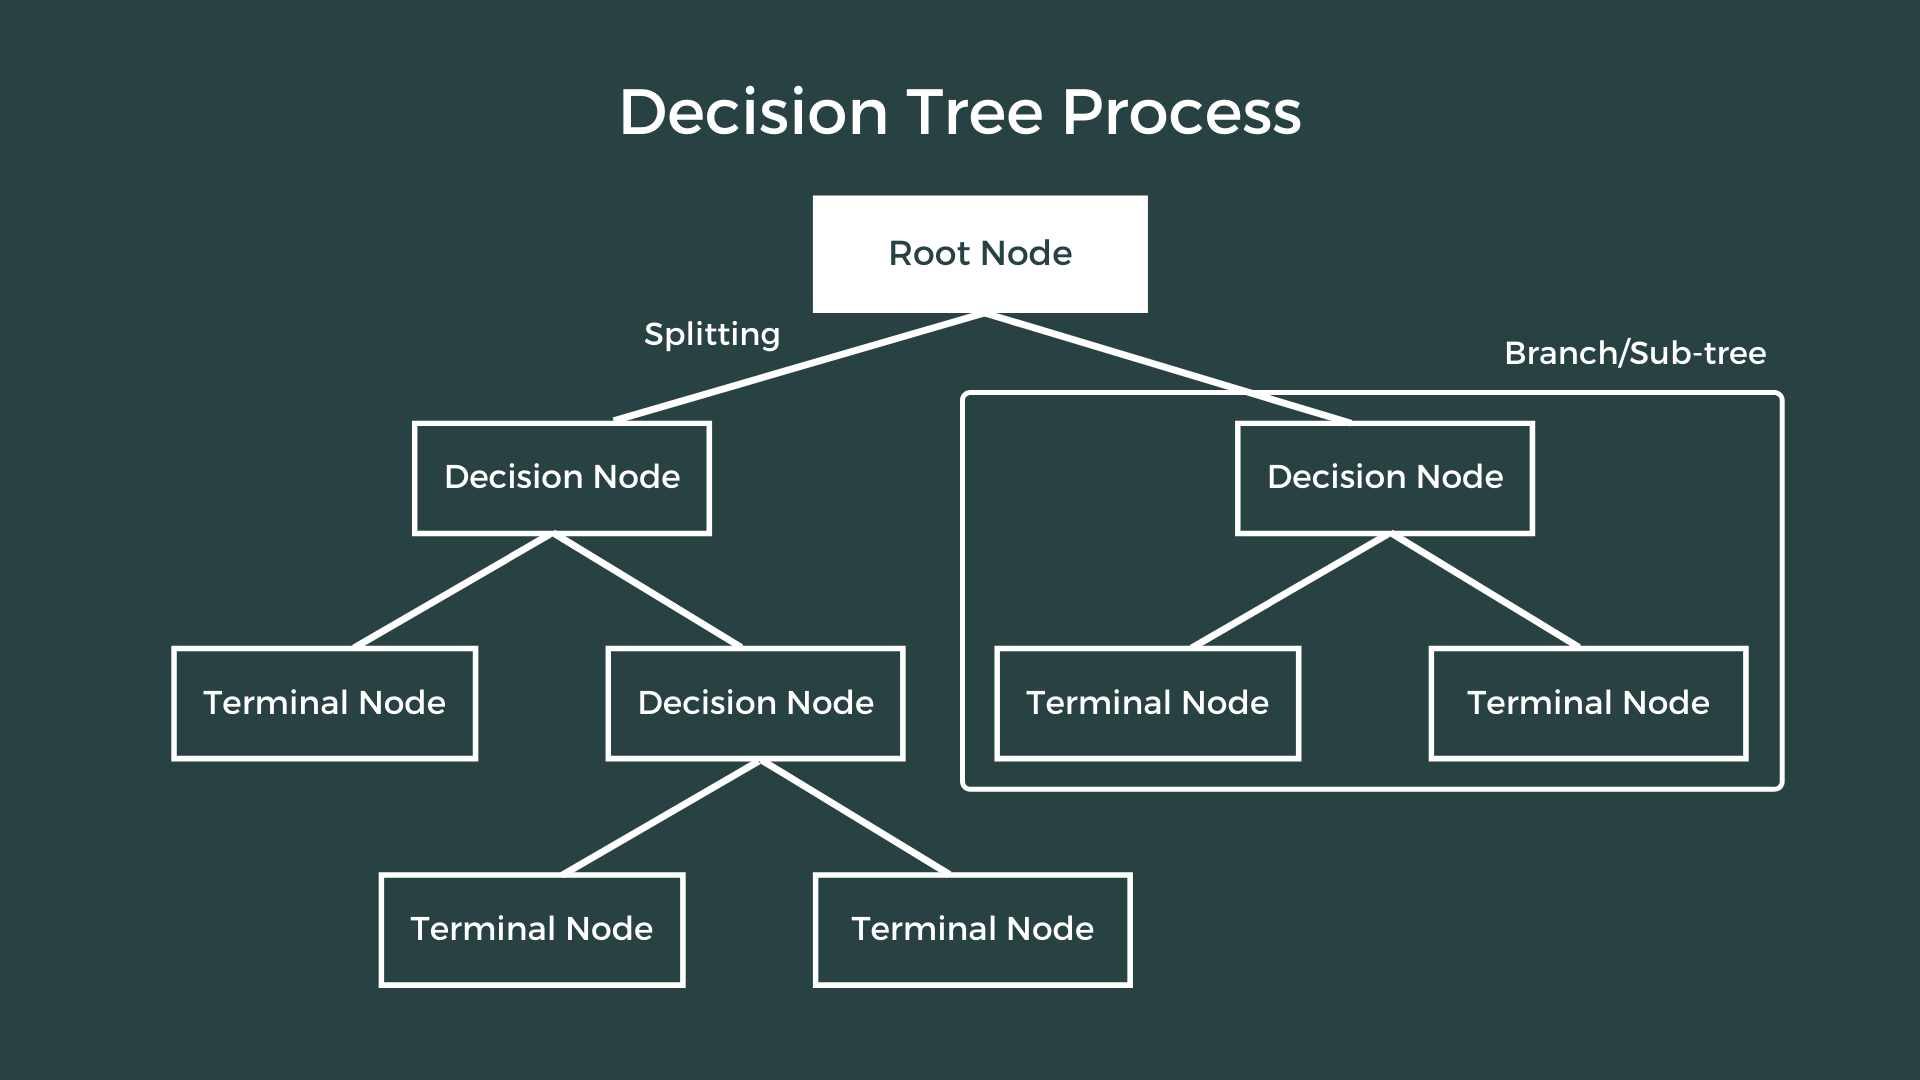

# Attribute Selection Measures
* While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

### Information Gain
### Gini Index
1. Information Gain:
Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.
A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:
#### Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)  

1. Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

#### Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)
Where,

* S= Total number of samples
* P(yes)= probability of yes
* P(no)= probability of no
2. Gini Index:
* Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
* An attribute with the low Gini index should be preferred as compared to the high Gini index.
* It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
* Gini index can be calculated using the below formula:
#### Gini Index= 1- ∑jPj2

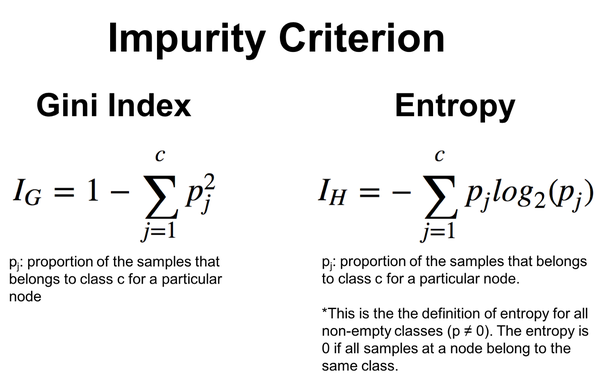

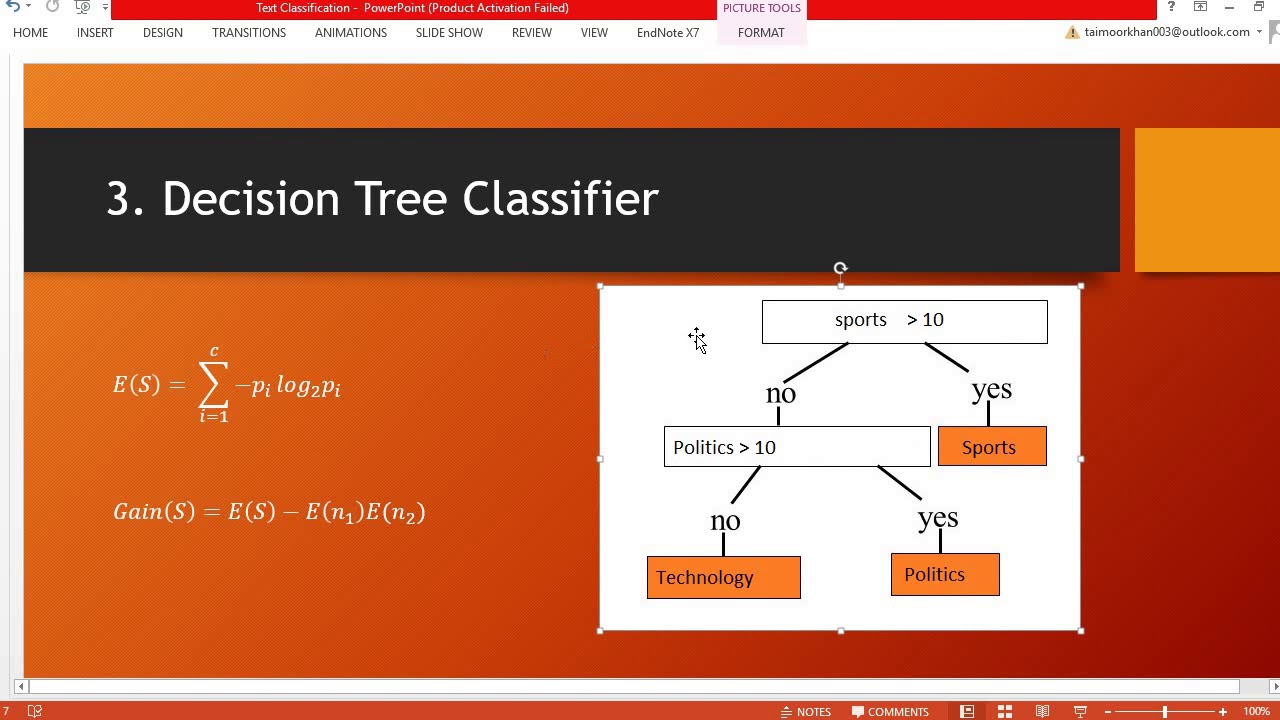

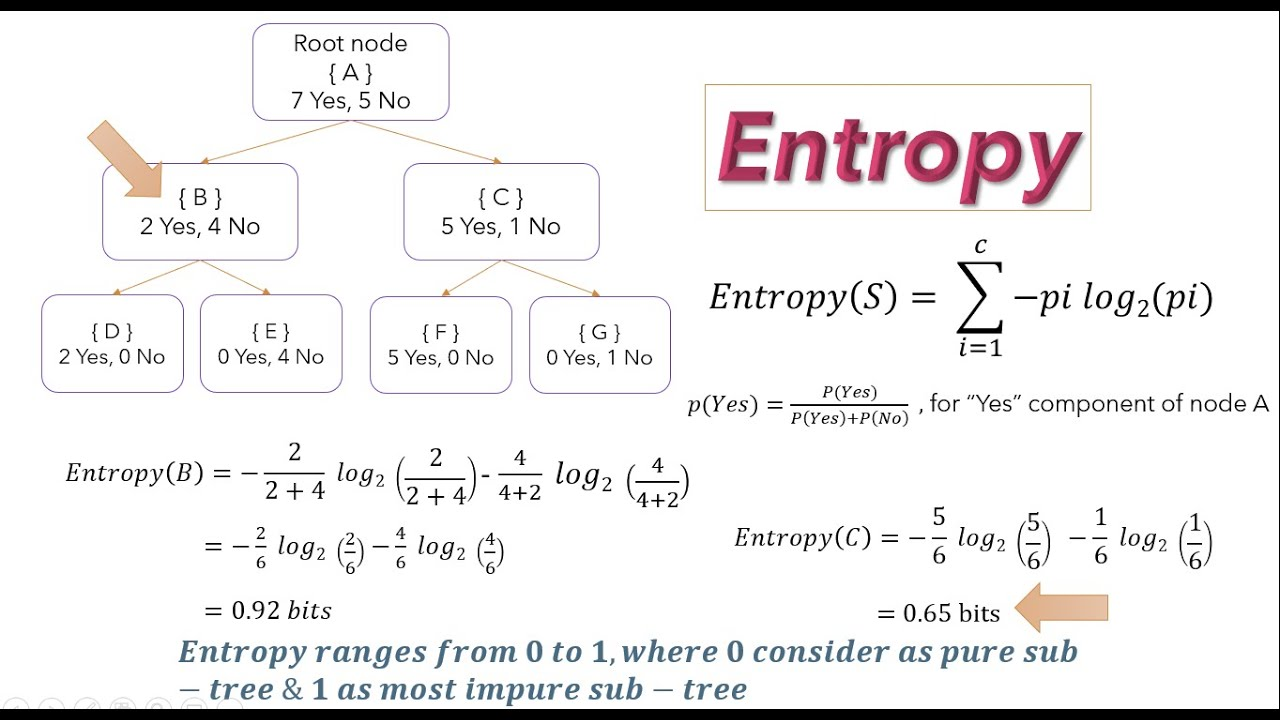

# ============================================================

# Imported the usefull Library

# ===========================================================

In [118]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.express as px
import missingno as mns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve
sns.set_theme(style="dark")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score
from IPython.display import Image
import graphviz

# =================================================
# ------------------------------Preprocessing the data-----------------------
# =================================================

In [119]:
df=sns.load_dataset("titanic")

In [120]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [121]:
## Cheaking the shape of the data
df.shape

(891, 15)

There is 891 rows and 15 columns in this dataset

In [122]:
## Information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## There is 2 boolen value ,2 categorical value ,2 float value ,4 integer value ,object 

In [123]:
# Applying the statistical function
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
nul=df.isna().sum().reset_index()
nul=nul.rename(columns={"index":"Name",0:"Error"})
nul=nul.sort_values(by="Error",ascending=False)
nul.T
nul['percantage']=(nul['Error']*100)/df.shape[0]
nul.T

,11,3,7,12,0,1,2,4,5,6,8,9,10,13,14
Name,deck,age,embarked,embark_town,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
Error,688,177,2,2,0,0,0,0,0,0,0,0,0,0,0
percantage,77.216611,19.86532,0.224467,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


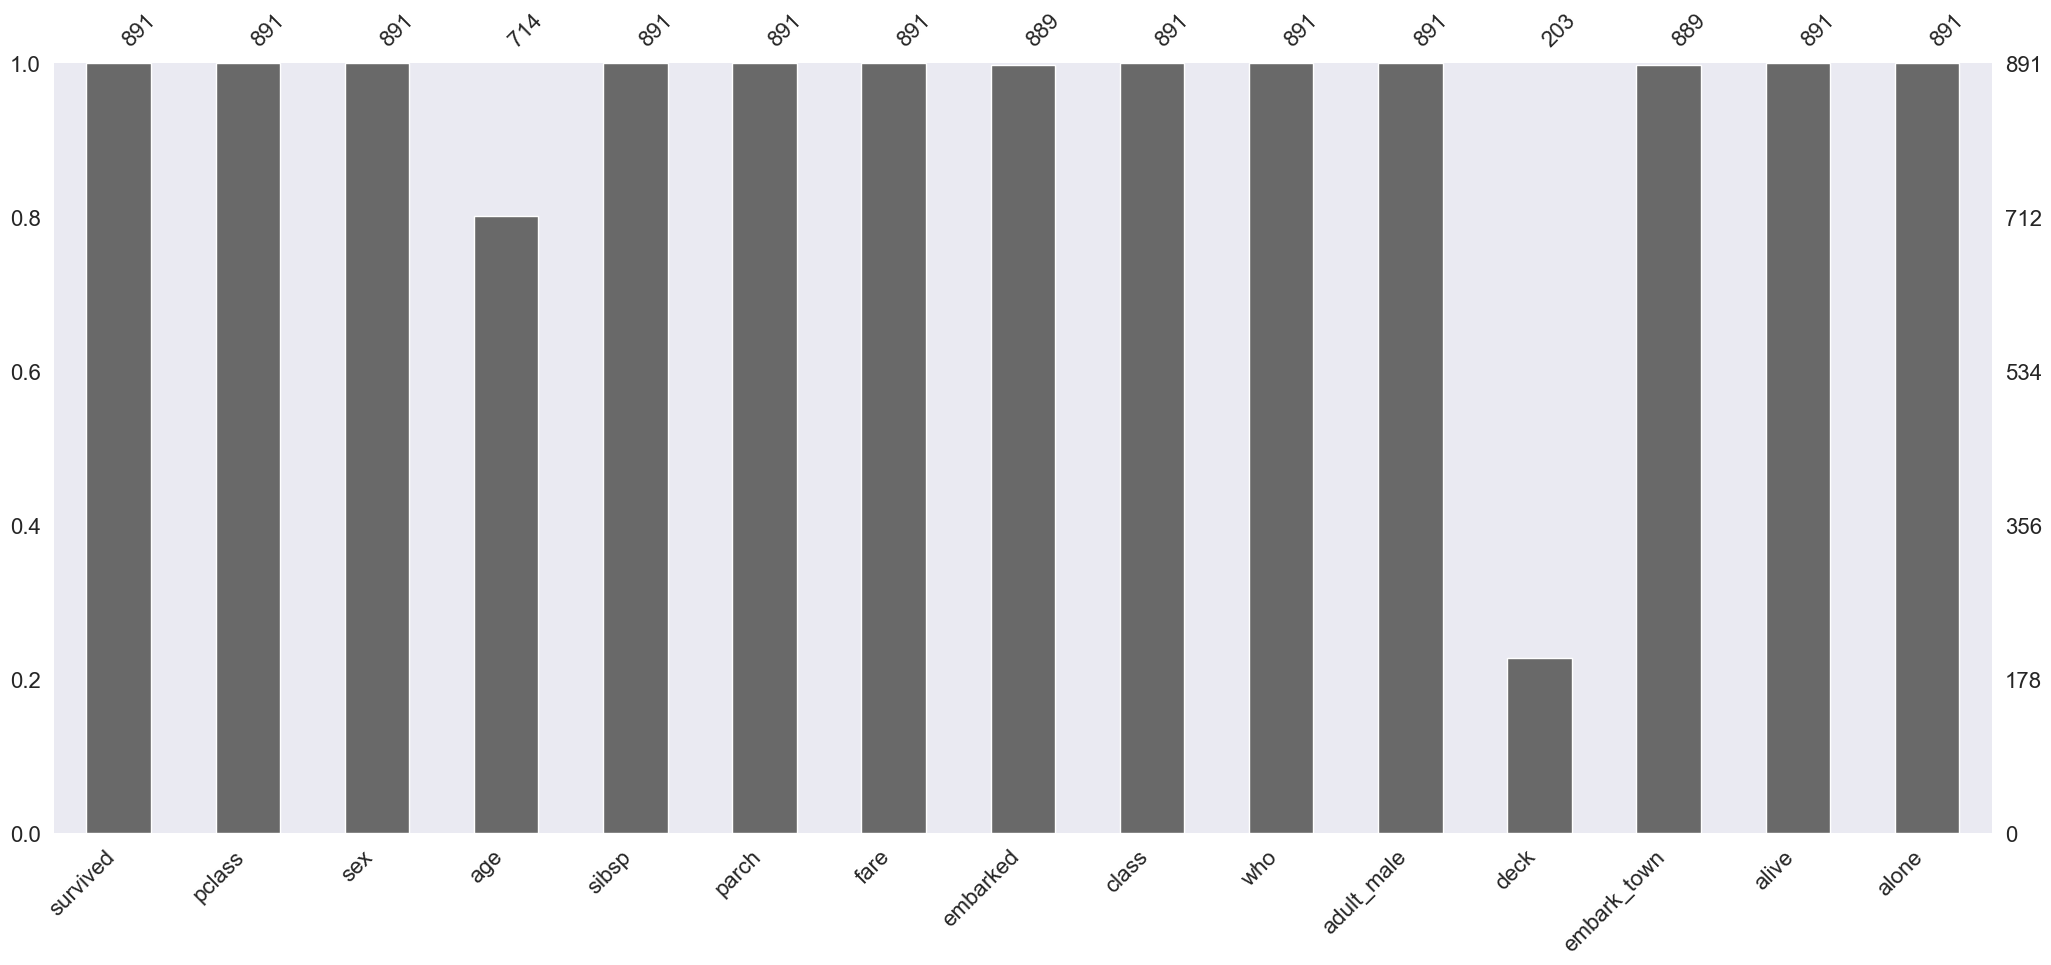

In [125]:
mns.bar(df);

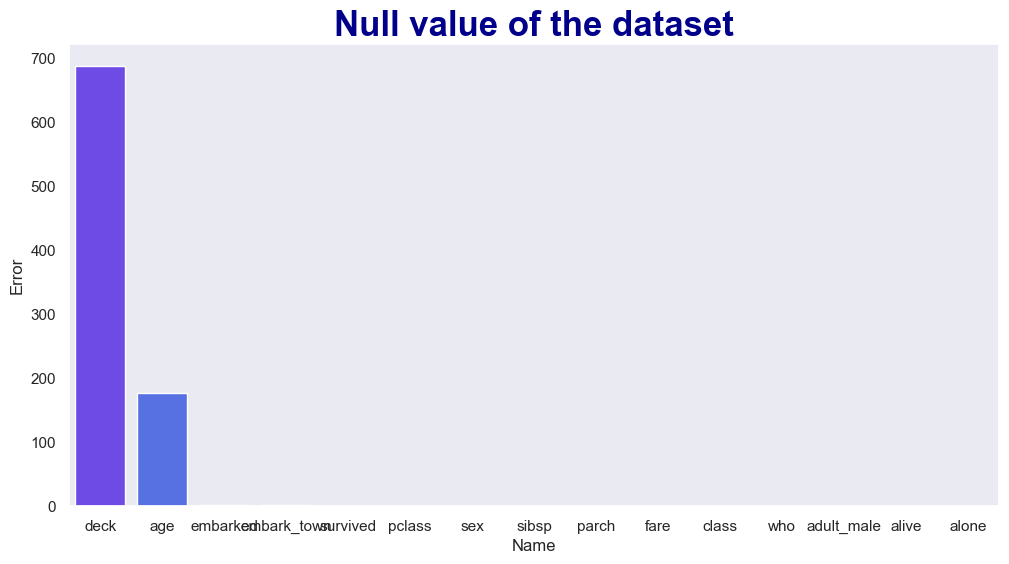

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(data=nul,x='Name',y='Error',palette="rainbow")
plt.title("Null value of the dataset",fontweight="bold",color="darkblue",fontsize=25)
plt.show()

## Insights 
*  Here is easily show that there is two columns in Null value
* columns Name is deck and age.
* In embarked columns and Embarked Town in two Null value shows

## Let's Clean the data with simple Imputer
* first of all import simple imputer from skleran
* After apply the Model


In [127]:
from sklearn.impute import SimpleImputer

In [128]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1=imp.fit_transform(df)
# Now Our dataset complety clened

In [129]:
dff=pd.DataFrame(df1,columns=df.columns)
dff.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


In [130]:
dff.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


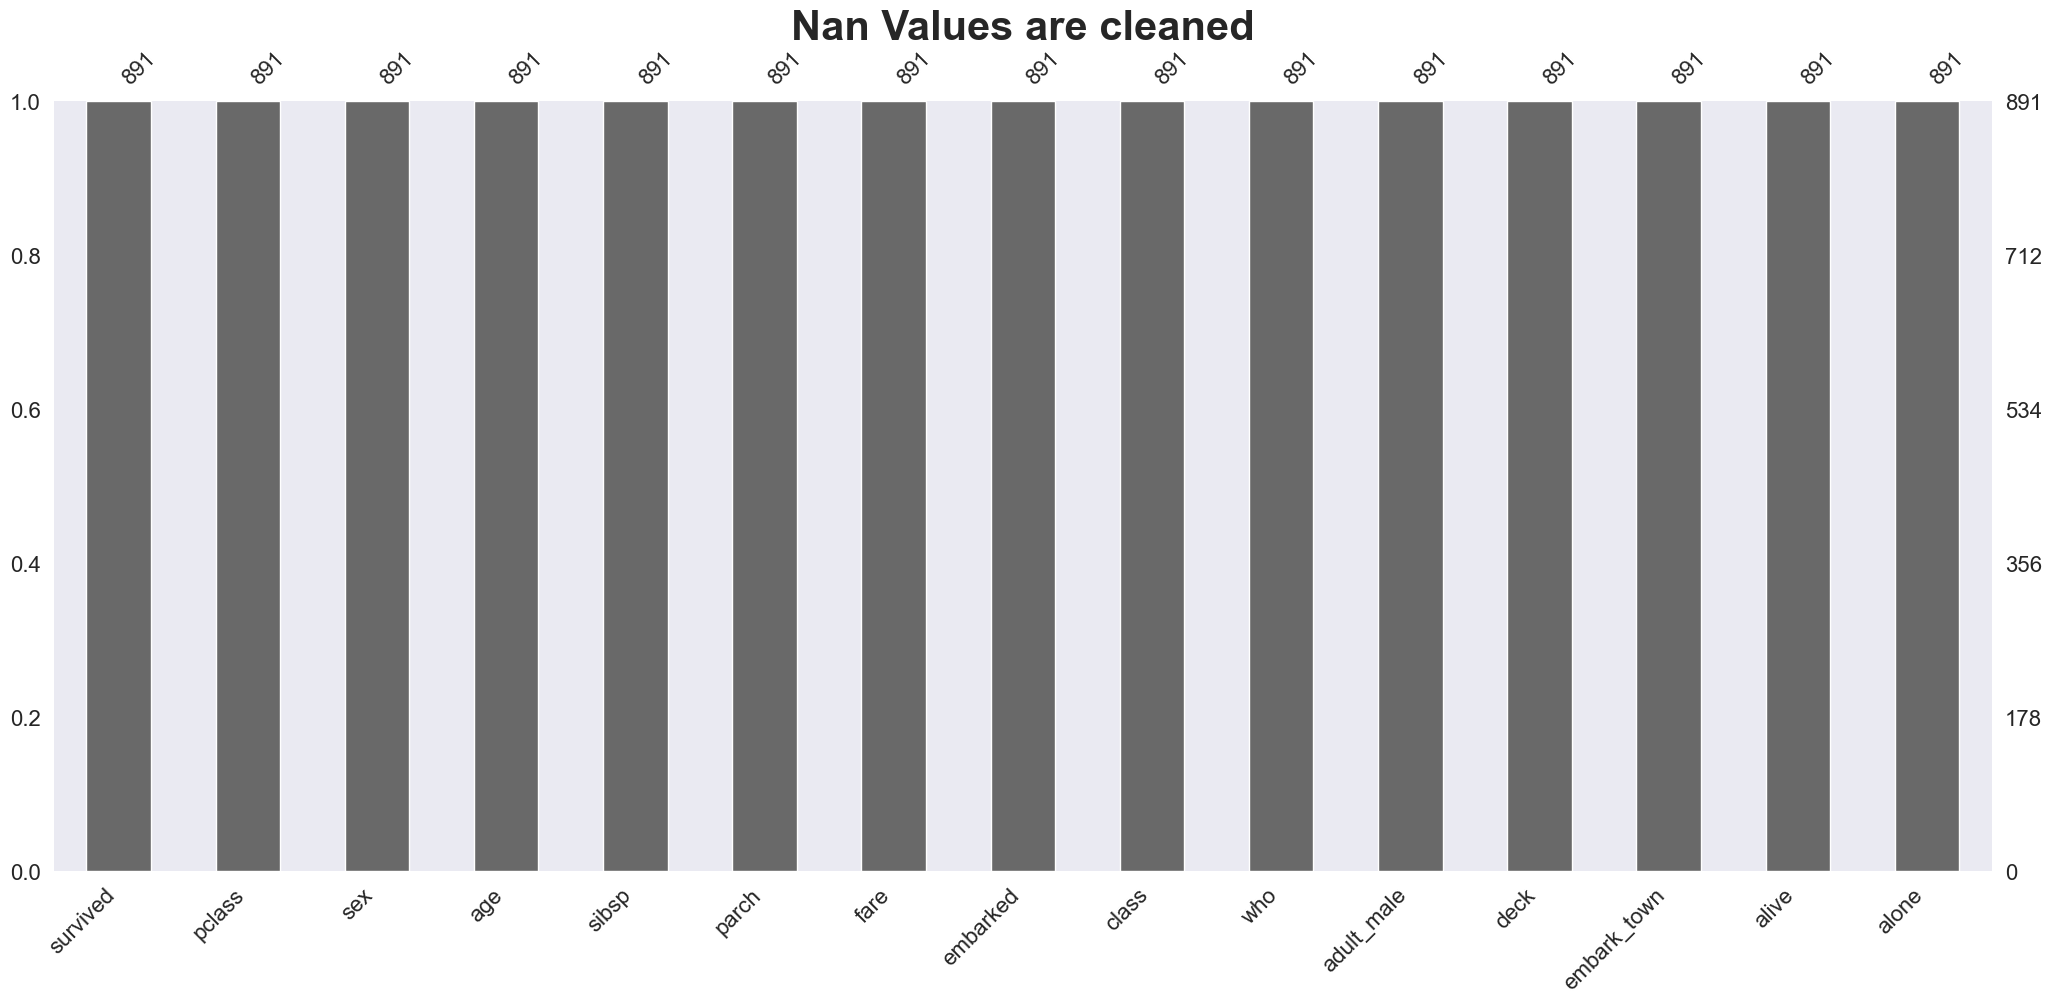

In [131]:
mns.bar(dff);
plt.title("Nan Values are cleaned",fontweight="bold",fontsize=30)
plt.show()

# ============================================================

## ---------------------------------Exploratory Data Analysis (EDA)-----------------------------------------

# ===========================================================

In [132]:
dff.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


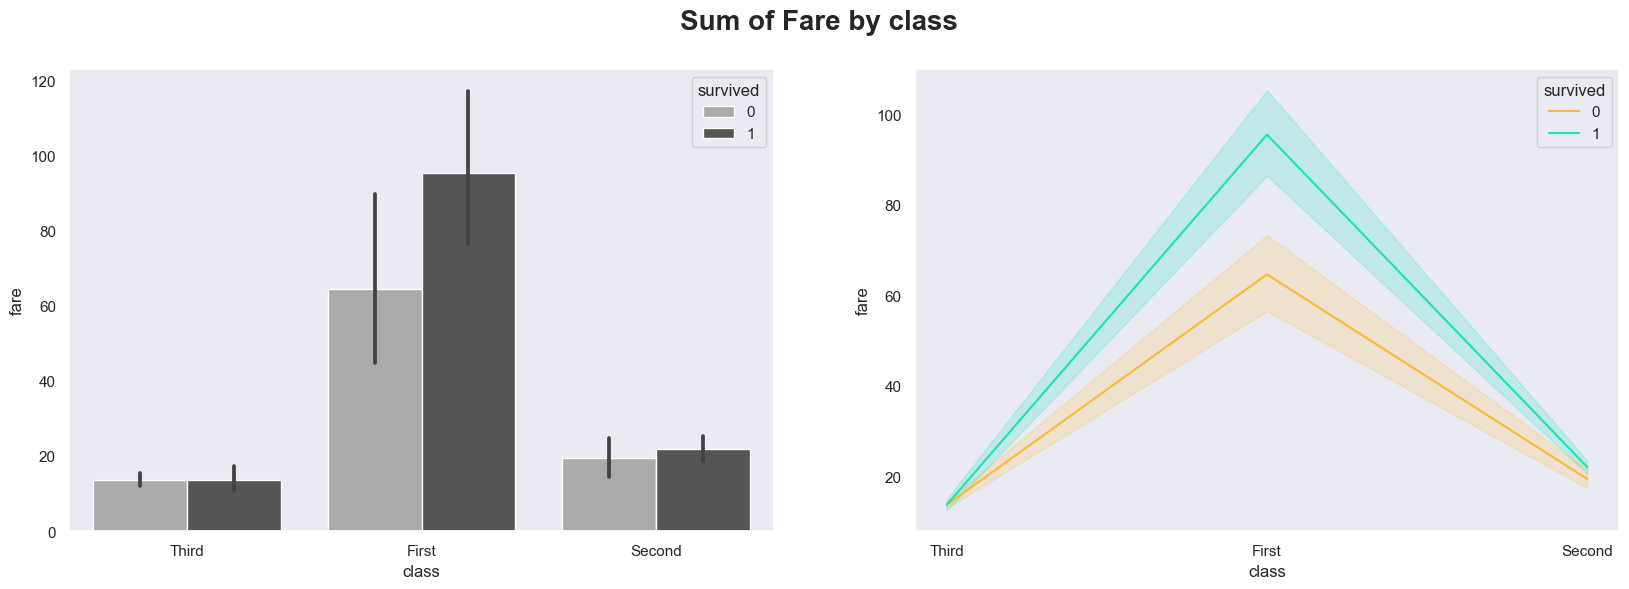

In [133]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=dff,x='class',y='fare',hue='survived',palette="gist_yarg",ci=100)
plt.subplot(1,2,2)
sns.lineplot(data=dff,x='class',y='fare',hue='survived',palette="turbo_r",ci=80)
plt.suptitle("Sum of Fare by class",fontweight="bold",fontsize=20)
plt.show()

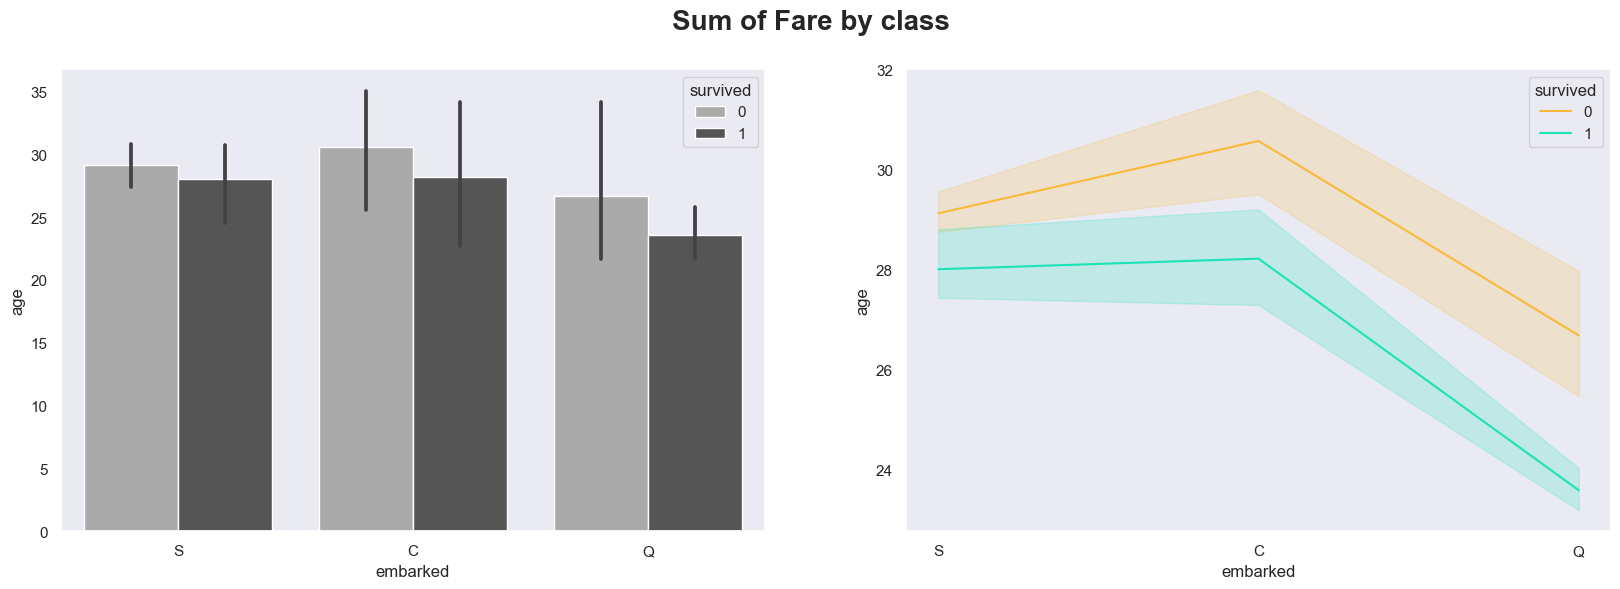

In [134]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=dff,x='embarked',y='age',hue='survived',palette="gist_yarg",ci=100)
plt.subplot(1,2,2)
sns.lineplot(data=dff,x='embarked',y='age',hue='survived',palette="turbo_r",ci=50,)
plt.suptitle("Sum of Fare by class",fontweight="bold",fontsize=20)
plt.show()

In [135]:
dff.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


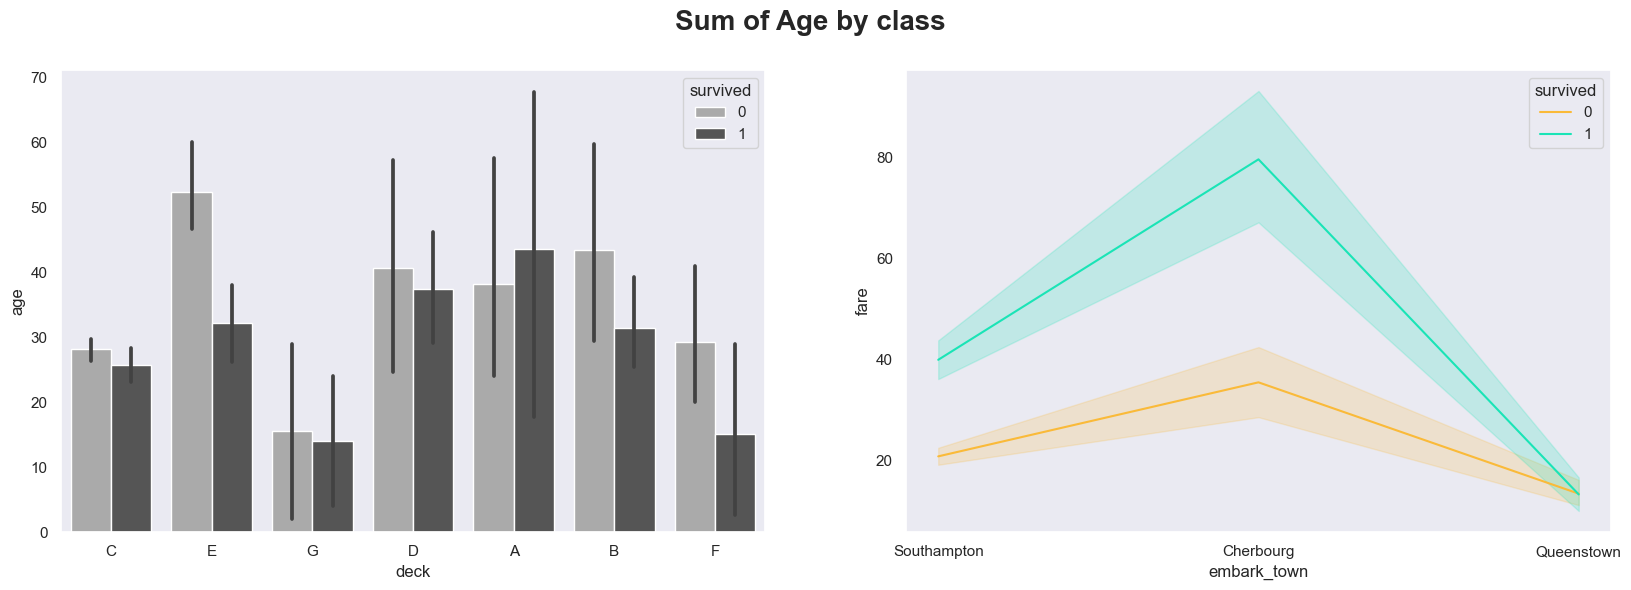

In [136]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=dff,x='deck',y='age',hue='survived',palette="gist_yarg",ci=100)
plt.subplot(1,2,2)
sns.lineplot(data=dff,x='embark_town',y='fare',hue='survived',palette="turbo_r",ci=80)
plt.suptitle("Sum of Age by class",fontweight="bold",fontsize=20)
plt.show()

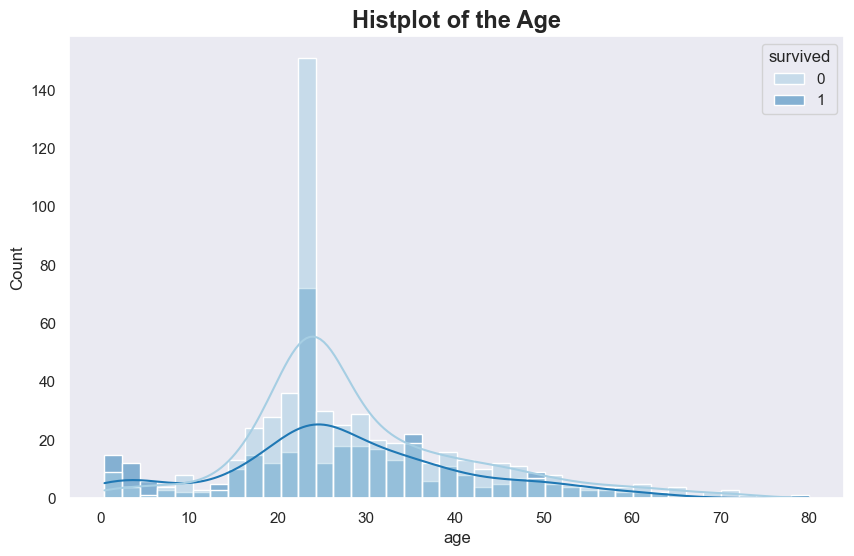

In [137]:
plt.figure(figsize=(10,6))
sns.histplot(data=dff,x='age',kde=True,bins=40,hue='survived',palette="Paired")
plt.title("Histplot of the Age",fontweight='bold',fontsize=17)
plt.show()

### Check the variences n this featurs and target

In [138]:
dff.var()

survived         0.236772
pclass           0.699015
age            174.228695
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [139]:
dff.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


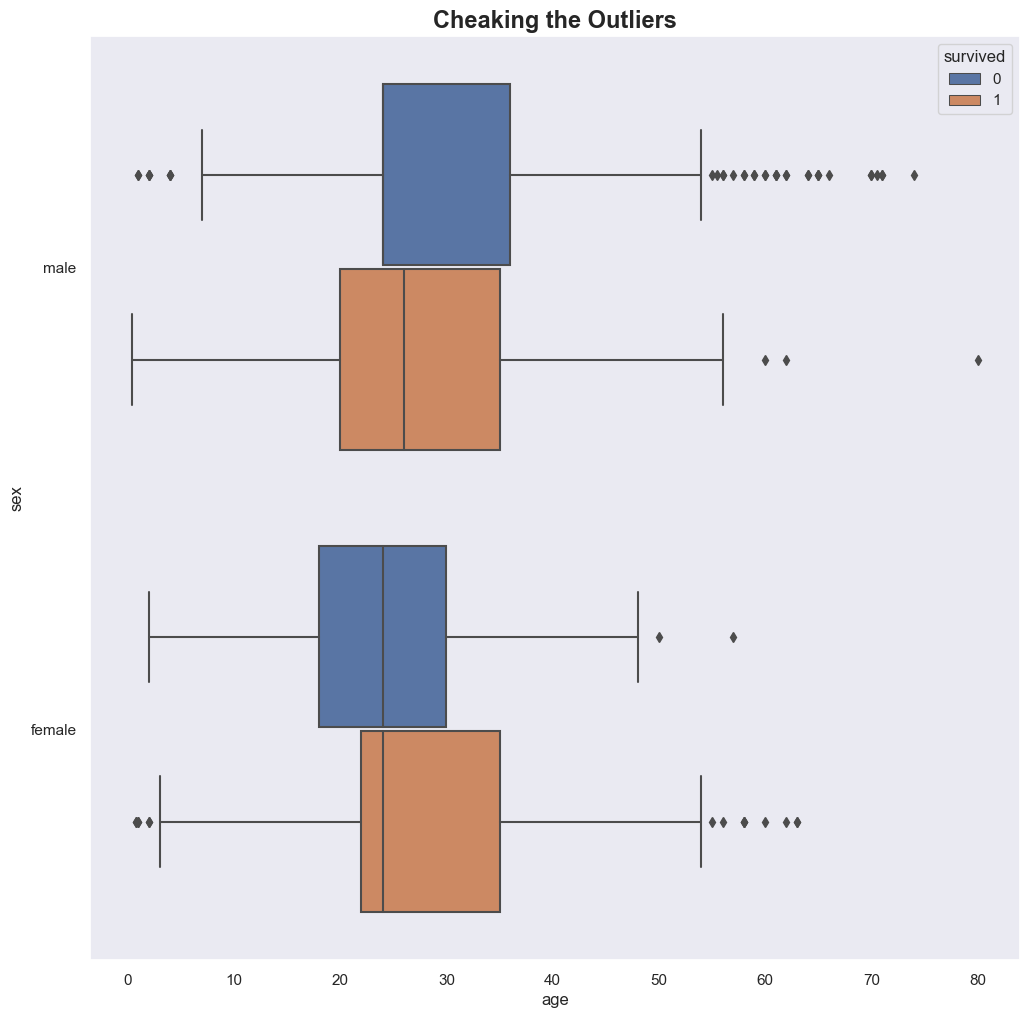

In [140]:
plt.figure(figsize=(12,12))
sns.boxplot(data=dff,x='age',y='sex',hue='survived')
plt.title("Cheaking the Outliers",fontweight="bold",fontsize=17)
plt.show()

In [141]:
dff.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


#### WE are going to drop the who columns because there is two same columns 

In [142]:
dff.drop('who',axis=1,inplace=True)

In [143]:
dff.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,True,C,Southampton,no,True


In [144]:
# Cheaking the unique value with this columns = ['sex','embarked','adult_male','embarked_town',alive]

In [145]:
dff.sex.unique()

array(['male', 'female'], dtype=object)

In [146]:
dff.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [147]:
dff.adult_male.unique()

array([True, False], dtype=object)

In [148]:
dff.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

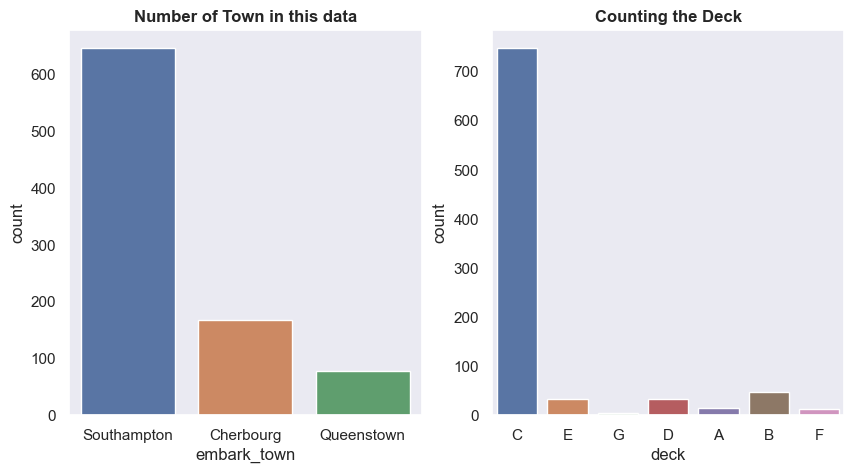

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dff['embark_town'])
plt.title("Number of Town in this data",fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(dff['deck'])
plt.title("Counting the Deck",fontweight="bold")
plt.show()

In [150]:
dff.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.0,S,Second,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,True,C,Queenstown,no,True


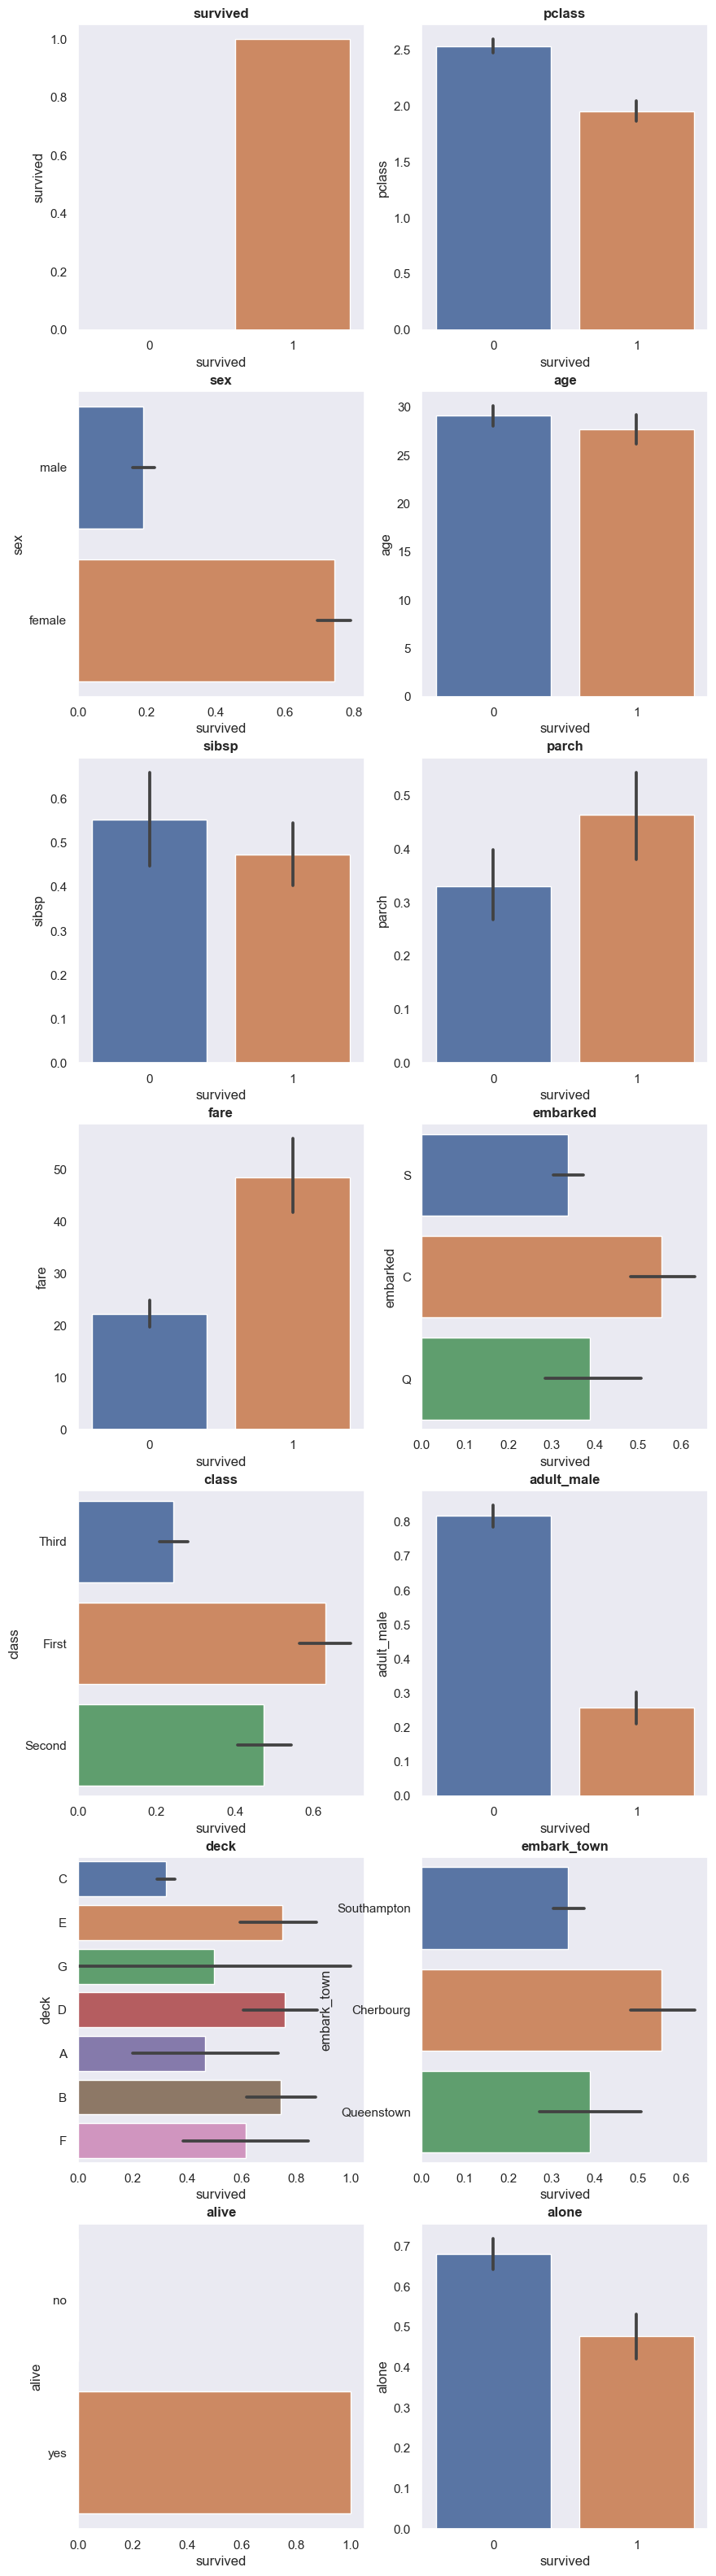

In [151]:
plt.figure(figsize=(10,40))
for i,j in enumerate(dff):
    #print(i,j)
    plt.subplot(7,2,i+1)
    sns.barplot(data=dff,x='survived',y=j)
    plt.title(j,fontweight='bold')
plt.show()

In [152]:
dff.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,True,C,Southampton,no,True


## We are going to one hot encoding with two columns deck and sex

In [153]:
dff=pd.get_dummies(data=dff,columns=['deck','sex'],drop_first=True)
dff.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,0,3,22.0,1,0,7.25,S,Third,True,Southampton,no,False,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,First,False,Cherbourg,yes,False,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.925,S,Third,False,Southampton,yes,True,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1,S,First,False,Southampton,yes,False,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.05,S,Third,True,Southampton,no,True,0,1,0,0,0,0,1


In [154]:
dff.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,0,3,22.0,1,0,7.25,S,Third,True,Southampton,no,False,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,First,False,Cherbourg,yes,False,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.925,S,Third,False,Southampton,yes,True,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1,S,First,False,Southampton,yes,False,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.05,S,Third,True,Southampton,no,True,0,1,0,0,0,0,1


In [155]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   survived     891 non-null    object
 1   pclass       891 non-null    object
 2   age          891 non-null    object
 3   sibsp        891 non-null    object
 4   parch        891 non-null    object
 5   fare         891 non-null    object
 6   embarked     891 non-null    object
 7   class        891 non-null    object
 8   adult_male   891 non-null    object
 9   embark_town  891 non-null    object
 10  alive        891 non-null    object
 11  alone        891 non-null    object
 12  deck_B       891 non-null    uint8 
 13  deck_C       891 non-null    uint8 
 14  deck_D       891 non-null    uint8 
 15  deck_E       891 non-null    uint8 
 16  deck_F       891 non-null    uint8 
 17  deck_G       891 non-null    uint8 
 18  sex_male     891 non-null    uint8 
dtypes: object(12), uint8(7)
memor

In [156]:
dff.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    0
alive          0
alone          0
deck_B         0
deck_C         0
deck_D         0
deck_E         0
deck_F         0
deck_G         0
sex_male       0
dtype: int64

##  Now we are going to convert the obejct data to float Label Encoding 

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
ln=LabelEncoder()
for i in dff:
    if dff[i].dtypes=="object":
        dff[i]=ln.fit_transform(dff[i])
    else:
        continue

In [159]:
dff.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,0,2,28,1,0,18,2,2,1,2,0,0,0,1,0,0,0,0,1
1,1,0,51,1,0,207,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2,34,0,0,41,2,2,0,2,1,1,0,1,0,0,0,0,0
3,1,0,47,1,0,189,2,0,0,2,1,0,0,1,0,0,0,0,0
4,0,2,47,0,0,43,2,2,1,2,0,1,0,1,0,0,0,0,1


In [160]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   survived     891 non-null    int32
 1   pclass       891 non-null    int32
 2   age          891 non-null    int32
 3   sibsp        891 non-null    int32
 4   parch        891 non-null    int32
 5   fare         891 non-null    int32
 6   embarked     891 non-null    int32
 7   class        891 non-null    int32
 8   adult_male   891 non-null    int32
 9   embark_town  891 non-null    int32
 10  alive        891 non-null    int32
 11  alone        891 non-null    int32
 12  deck_B       891 non-null    uint8
 13  deck_C       891 non-null    uint8
 14  deck_D       891 non-null    uint8
 15  deck_E       891 non-null    uint8
 16  deck_F       891 non-null    uint8
 17  deck_G       891 non-null    uint8
 18  sex_male     891 non-null    uint8
dtypes: int32(12), uint8(7)
memory usage: 48.0 KB


## Here is to Target survived and alive we have to drop one

In [161]:
dff.drop("alive",axis=1,inplace=True)

In [162]:
# Extracting the Target and features
target=dff[['survived']]
target.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [163]:
# Features in this dataset
features=dff.drop("survived",axis=1)
features.head()

,pclass,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,2,28,1,0,18,2,2,1,2,0,0,1,0,0,0,0,1
1,0,51,1,0,207,0,0,0,0,0,0,1,0,0,0,0,0
2,2,34,0,0,41,2,2,0,2,1,0,1,0,0,0,0,0
3,0,47,1,0,189,2,0,0,2,0,0,1,0,0,0,0,0
4,2,47,0,0,43,2,2,1,2,1,0,1,0,0,0,0,1


### Decision Tree in we can't standard scalling beacause its split the features according to conditions

In [164]:
# train test split features and target

In [165]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=45)

In [166]:
print("="*100)
print("Shape of the x_train :-",x_train.shape)
print("="*100)
print("Shape of the x_test :-",x_test.shape)
print("="*100)
print("Shape of the y_train :-",y_train.shape)
print("="*100)
print("Shape of the y_test :-",y_test.shape)
print("="*100)
print("="*100)

Shape of the x_train :- (712, 17)
Shape of the x_test :- (179, 17)
Shape of the y_train :- (712, 1)
Shape of the y_test :- (179, 1)


# ========================================================

# ------------------------Apply the model Decision Tree---------------------------- 

# ========================================================

In [167]:
dtr=DecisionTreeClassifier()
fits=dtr.fit(x_train,y_train)
print("="*100)
print(fits)
print("="*100)

DecisionTreeClassifier(max_depth=4)


In [168]:
pred=dtr.predict(x_test)
pred2=dtr.predict(x_train)
print("="*100)
print("="*100)
print(pred)
print("="*100)
print("="*100)

[1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0]


In [169]:
ac=dtr.score(x_test,y_test)
ac2=dtr.score(x_train,y_train)

In [170]:
print("="*100)
print(f"Accuracy of the test data :- {ac}")
print("="*100)
print("="*100)
print(f"Accuracy of the train data :- {ac2}")
print("="*100)

Accuracy of the test data :- 0.8659217877094972
Accuracy of the train data :- 0.8441011235955056


## Insights from the accuracy
* Our Model is Getting A condition that is Overfitting
* Beacuse my model is working well on training data
* But Not working well on test data
* so its Test Accuracy and train Accuracy in big difference 
* I can say that here we getting overfitting
* Low Bias and High Varience

In [171]:
cm=confusion_matrix(y_test,pred)
print("="*100)
print(cm)
print("="*100)

[[103  14]
 [ 10  52]]


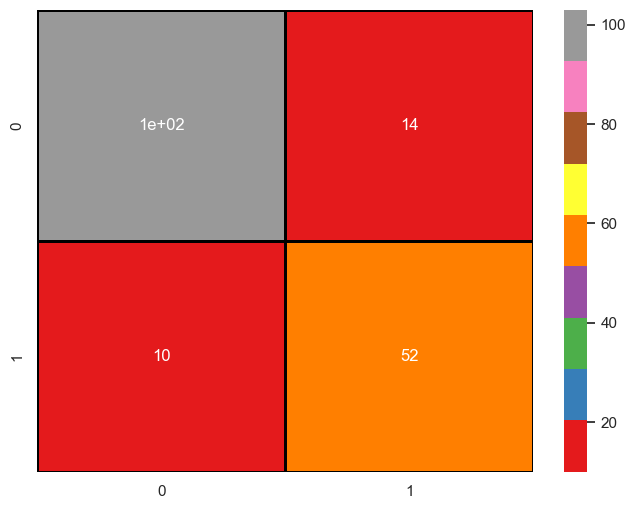

In [172]:
print("="*100)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,linewidths=1,linecolor="black",cmap='Set1')
plt.show()
print("="*100)

In [173]:
clr=classification_report(y_test,pred)
print("="*100)
print(clr)
print("="*100)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       117
           1       0.79      0.84      0.81        62

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



In [174]:
from sklearn import tree

## Plotting the Decision Tree by Code

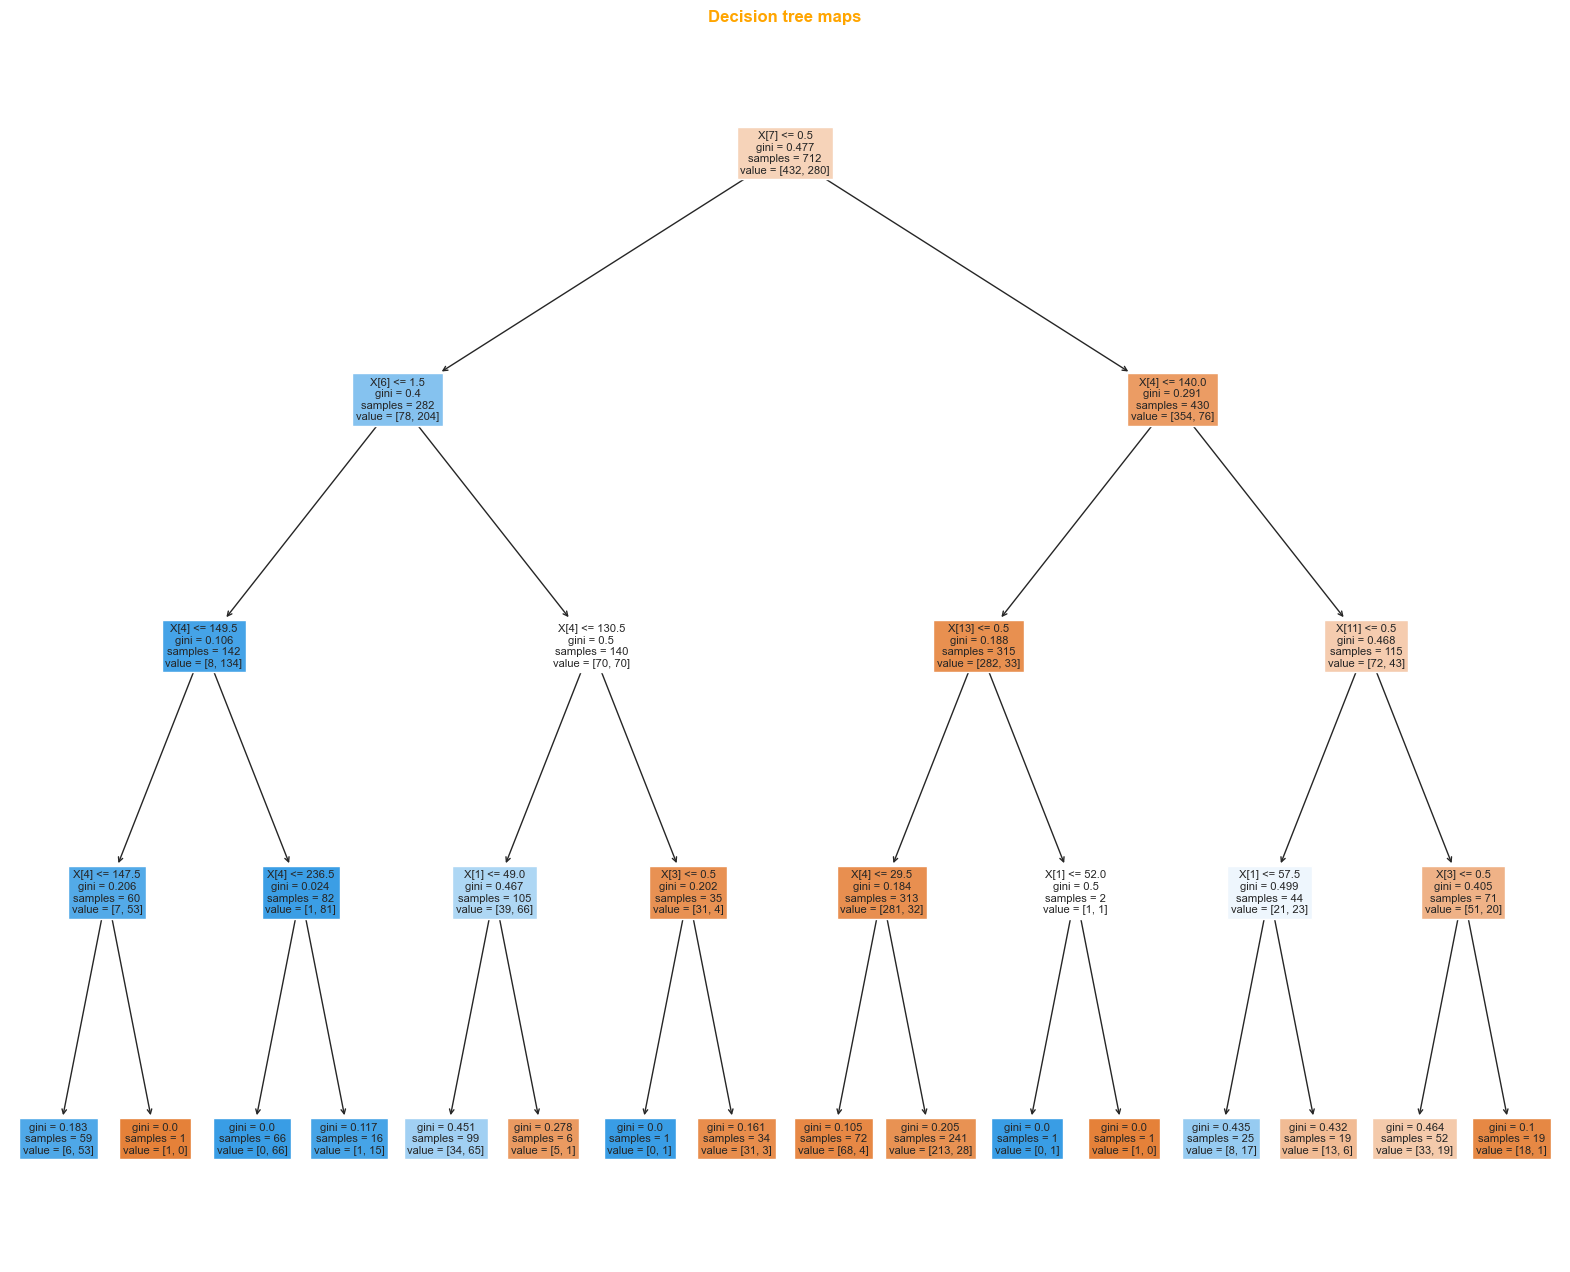

In [175]:
plt.figure(figsize=(20,16))
tree.plot_tree(fits,filled=True)
plt.title("Decision tree maps",fontweight="bold",color="orange")
plt.show()

# ==========================================================

## -------------------------------HyperTuning The Decision Tree Model-------------------------------------

# =========================================================

In [176]:
dt=DecisionTreeClassifier()
perameter={"max_depth":range(2,50),
          "criterion":["gini","entroy"],
          "splitter":["best","random"],
          "min_samples_split":range(1,5),
          "min_samples_leaf":range(1,5),
          "max_features":["auto", "sqrt", "log2"]}

In [177]:
s={'criterion':['gini','entropy'],
   'max_depth':range(2,32,1),
   'min_samples_leaf':range(1,10,1),
   'min_samples_split':range(1,10,1),
   'splitter':['best','random']
  }
s

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 32),
 'min_samples_leaf': range(1, 10),
 'min_samples_split': range(1, 10),
 'splitter': ['best', 'random']}

In [178]:
# # Creating the hyperparameter grid
# param_dist = {"max_depth": [3, None],
#               "max_features": np.random.randint(1, 9),
#               "min_samples_leaf": randint(1, 9),
#               "criterion": ["gini", "entropy"]}

In [179]:
# criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     class_weight=None,
#     ccp_alpha=0.0,

In [180]:
grd=GridSearchCV(dt,param_grid=perameter,cv=5,n_jobs=-1)
fix=grd.fit(x_train,y_train)
fix

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entroy'],
                         'max_depth': range(2, 50),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5),
                         'splitter': ['best', 'random']})

In [181]:
param=grd.best_params_

In [182]:
grd.score(x_test,y_test)

0.8100558659217877

In [183]:
dtrr=DecisionTreeClassifier(**param)
fit=dtrr.fit(x_train,y_train)
print("="*80)
print(fit)
print("="*80)

DecisionTreeClassifier(max_depth=46, max_features='auto', min_samples_leaf=3,
                       min_samples_split=4)


In [184]:
ppr=dtrr.predict(x_test)
ppp=dtrr.predict(x_train)
print("="*80)
print(ppr)
print("="*80)

[1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0]


In [185]:
acs=dtrr.score(x_test,y_test)
acs1=dtrr.score(x_train,y_train)

In [186]:
print("="*80)
print(f"Acccuracy of the test data after the hypertuning :- {acs}")
print("="*80)
print(f"Acccuracy of the train data after the hypertuning :- {acs1}")
print("="*80)

Acccuracy of the test data after the hypertuning :- 0.8715083798882681
Acccuracy of the train data after the hypertuning :- 0.8609550561797753


In [187]:
#print("="*80)
cm=confusion_matrix(y_test,ppr)
print("="*80)
print(cm)
print("="*80)

[[107  10]
 [ 13  49]]


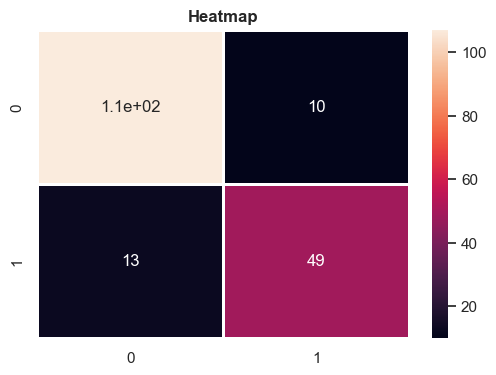

In [188]:
print("="*90)
print("="*90)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,linecolor="white",linewidths=1)
plt.title("Heatmap",fontweight="bold")
plt.show()
print("="*90)
print("="*90)

In [189]:
clr=classification_report(y_test,ppr)
print("="*80)
print(clr)
print("="*80)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       117
           1       0.83      0.79      0.81        62

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



# Plotting the Decision Tree 

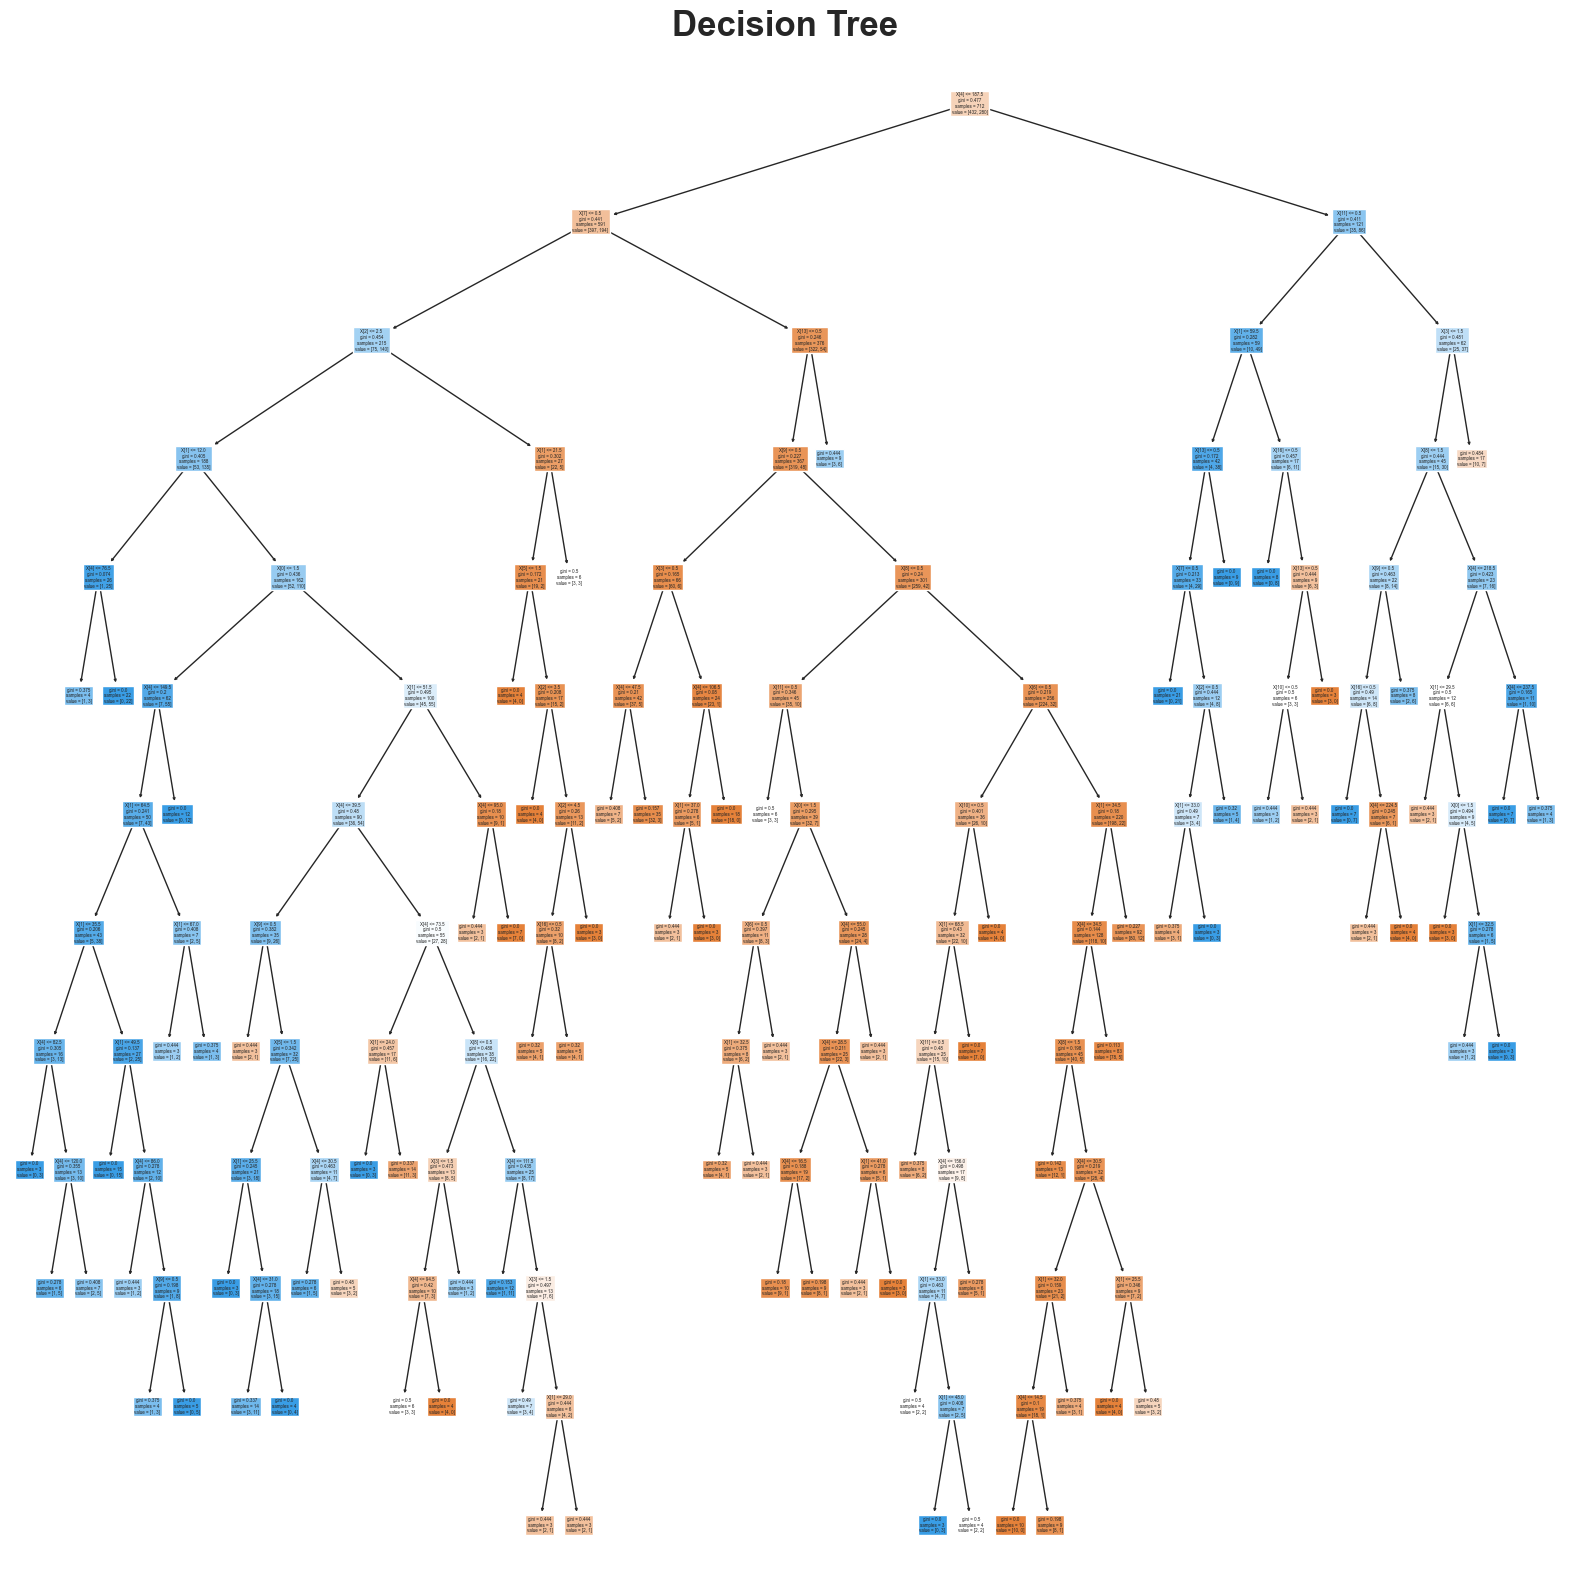

In [190]:
plt.figure(figsize=(20,20))
tree.plot_tree(fit,filled=True)
plt.title("Decision Tree",fontweight="bold",fontsize=25)
plt.show()

# =============================================================
## Observations
# =============================================================

Here we Decision Tree Classifier Algorithms on titanic dataset

Abstract
In this Kernel we're going to take a look at Decision Trees using Python and the Titanic dataset. It's not intended to be the most accurate Titanic survival model out there, but to explain how to create, visualise and understand Classification Trees. The main aspects covered are:

Learning from the data with Decision Trees
Dataset exploration and processing
Relevant features for Decision Trees
Gini Impurity
Finding best tree depth with the help of cross-validation
Generating and visualising the final model
This is my first Kernel, so please feel free to include any suggestions, comments or critics!

When applying Machine Learning algorithms, it's critical to always keep in mind the problem we're trying to solve. In most cases, the most accurate and robust model might be what you're looking for. But sometimes we need to actually get insights from the available data and in these cases transparent, easy to understand models like Decision Trees will greatly simplify our task.

If we need to build a model that will be directly used for some task and only show it's end results, then we don't really care about building some kind of "blackbox" if it's accurate enough (image or speech recognition for example). That's why advanced techniques such as Deep Learning or Ensemble Learning (cf. Anisotropic Kernel) are commonly used for complex tasks. But remember the KISS principle (Keep It Simple, Stupid)! Always consider the complexity/accuracy trade-off: complex techniques should only be used if they offer significant improvements. Simpler models are also less prone to over-fitting and tend to generalise better.

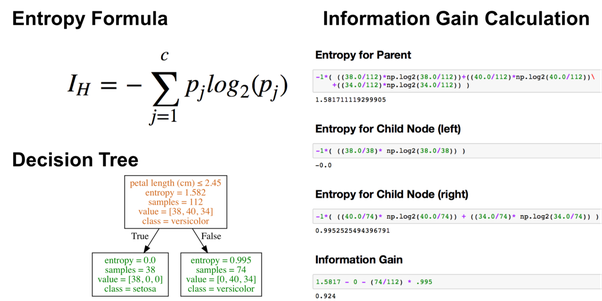

# Thanks For Wathching My Notebook 😊😊😊😊